## *System to predict if a person will survive the titanic sinking and identify the key factors influencing Survival*

In [1]:
# importing required libreries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns


In [2]:
df = pd.read_csv("P:\Artificial Intelligence\Machine Learning\Dataset\Titanic-Dataset.csv")

In [3]:
# To show all columns & rows

pd.set_option('display.max_columns', None)


In [4]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


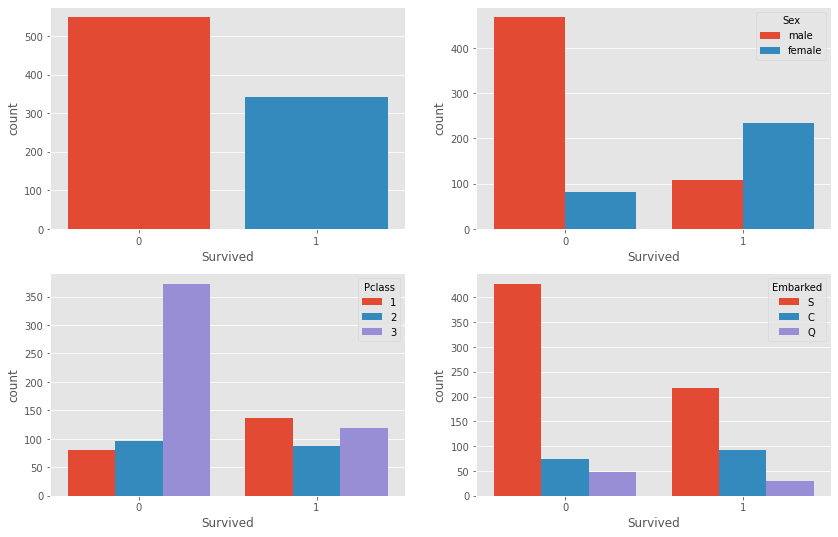

In [5]:
# data visualization
style.use('ggplot')
plt.figure(figsize=(14, 9))

plt.subplot(2,2,1)
sns.countplot(x='Survived', data=df, saturation=1)

plt.subplot(2,2,2)
sns.countplot(x='Survived', data=df, hue=df['Sex'], saturation=1)

plt.subplot(2,2,3)
sns.countplot(x='Survived', data=df, hue=df['Pclass'], saturation=1)

plt.subplot(2,2,4)
sns.countplot(x='Survived', data=df, hue=df['Embarked'], saturation=1)
plt.show()

C:\Users\Aditya\AppData\Local\Temp/ipykernel_5880/3316132457.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), linewidths=2, linecolor="w", vmin=-1, vmax=1, annot=True)


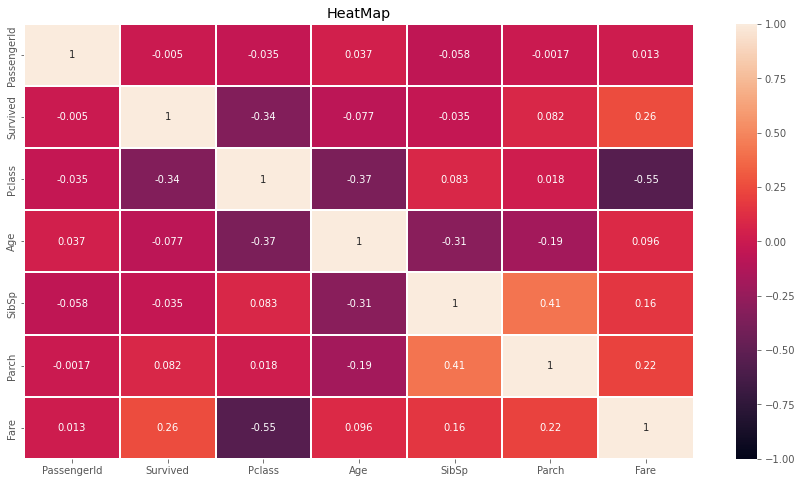

In [6]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(), linewidths=2, linecolor="w", vmin=-1, vmax=1, annot=True)
plt.title("HeatMap")
# plt.xlabel("Lenth in cm")
# plt.ylabel("length in cm")
plt.show()

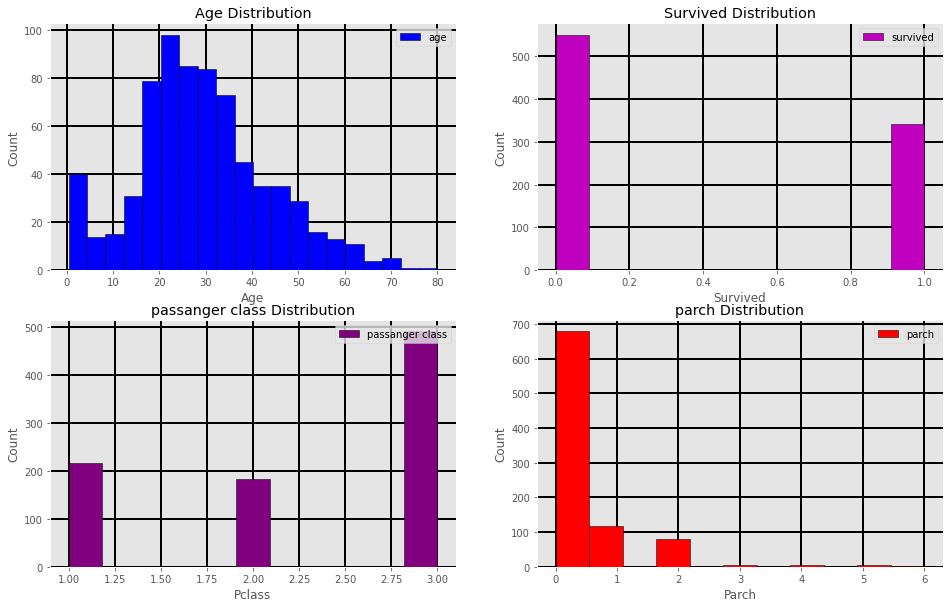

In [7]:
plt.figure(figsize=(16,10))

plt.subplot(2,2,1)
sns.histplot(df['Age'], color='b', alpha = 1, kde=False, label = 'age', edgecolor = 'k')
plt.title('Age Distribution')
plt.legend(loc = 1)
plt.grid(color = 'k', linewidth = 2)

plt.subplot(2,2,2)
sns.histplot(df['Survived'], color='m', alpha = 1, kde=False, label = 'survived', edgecolor = 'k')
plt.title('Survived Distribution')
plt.legend(loc = 1)
plt.grid(color = 'k', linewidth = 2)

plt.subplot(2,2,3)
sns.histplot(df['Pclass'], color='purple', alpha = 1, kde=False, label = 'passanger class', edgecolor = 'k')
plt.title('passanger class Distribution')
plt.legend(loc = 1)
plt.grid(color = 'k', linewidth = 2)

plt.subplot(2,2,4)
sns.histplot(df['Parch'], color='r', alpha = 1, kde=False, label = 'parch', edgecolor = 'k')
plt.title('parch Distribution')
plt.legend(loc = 1)
plt.grid(color = 'k', linewidth = 2)
plt.show()


In [ ]:
# Automated EDA using sweetviz library

import sweetviz as sv

report = sv.analyze(df)
report.show_html('sweetviz_titanic_report.html')


In [9]:
print('The shape of the dataset: ', df.shape)

The shape of the dataset:  (891, 12)


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [11]:
# finding null values & null value percentage

null_val = df.isnull().sum()
null_val_p = df.isnull().mean()*100
print(null_val, '\n')
print(null_val_p)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64 

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64


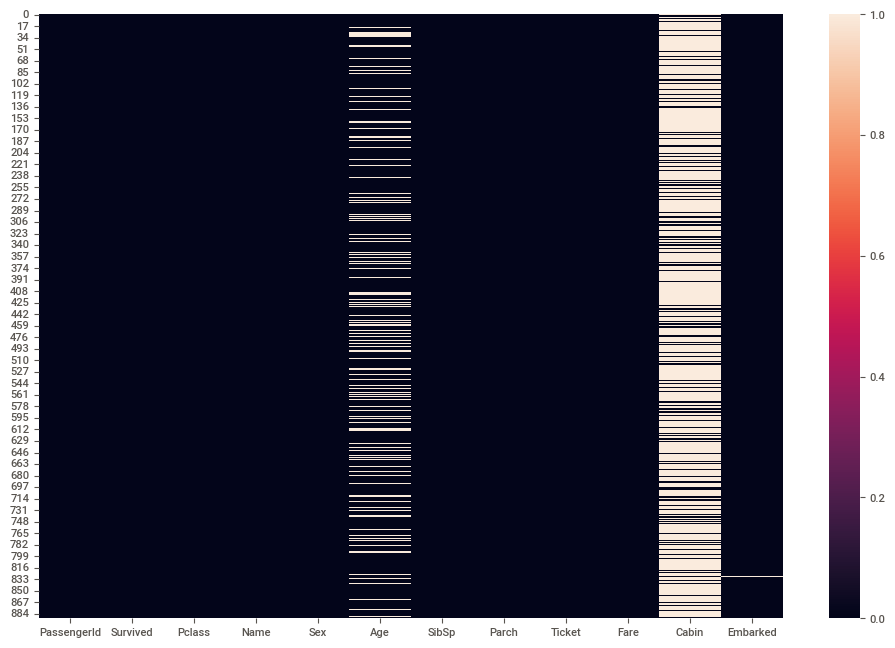

In [12]:
# visualizing null values

plt.figure(figsize=(12,8))
sns.heatmap(df.isnull())
plt.show()

In [13]:
# Data cleaning

df1 = df.drop(columns=['PassengerId', 'Fare', 'Name', 'Ticket', 'Cabin'])
df1.head()


,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,male,22.0,1,0,S
1,1,1,female,38.0,1,0,C
2,1,3,female,26.0,0,0,S
3,1,1,female,35.0,1,0,S
4,0,3,male,35.0,0,0,S


In [14]:
# caregorized numeric and categorical features

num_vars = df1.select_dtypes(include=['int64', 'float64']).columns
print(num_vars)

cat_vars = df1.select_dtypes(include= 'object').columns
print(cat_vars)

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch'], dtype='object')
Index(['Sex', 'Embarked'], dtype='object')


In [15]:
df2 = df1.dropna()

In [16]:
df2.shape

(712, 7)

In [17]:
df2.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Embarked    0
dtype: int64

In [18]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  712 non-null    int64  
 1   Pclass    712 non-null    int64  
 2   Sex       712 non-null    object 
 3   Age       712 non-null    float64
 4   SibSp     712 non-null    int64  
 5   Parch     712 non-null    int64  
 6   Embarked  712 non-null    object 
dtypes: float64(1), int64(4), object(2)
memory usage: 44.5+ KB


In [19]:
df2.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,male,22.0,1,0,S
1,1,1,female,38.0,1,0,C
2,1,3,female,26.0,0,0,S
3,1,1,female,35.0,1,0,S
4,0,3,male,35.0,0,0,S


In [20]:
# Data Preprocessing

from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

for var in df2:
    if df2[var].dtype == 'object':
        df2[var] = encoder.fit_transform(df2[var])

#for Embarked C=0, Q=1, S=2

C:\Users\Aditya\AppData\Local\Temp/ipykernel_5880/3851412176.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[var] = encoder.fit_transform(df2[var])


In [21]:
df2.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,1,22.0,1,0,2
1,1,1,0,38.0,1,0,0
2,1,3,0,26.0,0,0,2
3,1,1,0,35.0,1,0,2
4,0,3,1,35.0,0,0,2


<Figure size 1600x900 with 0 Axes>

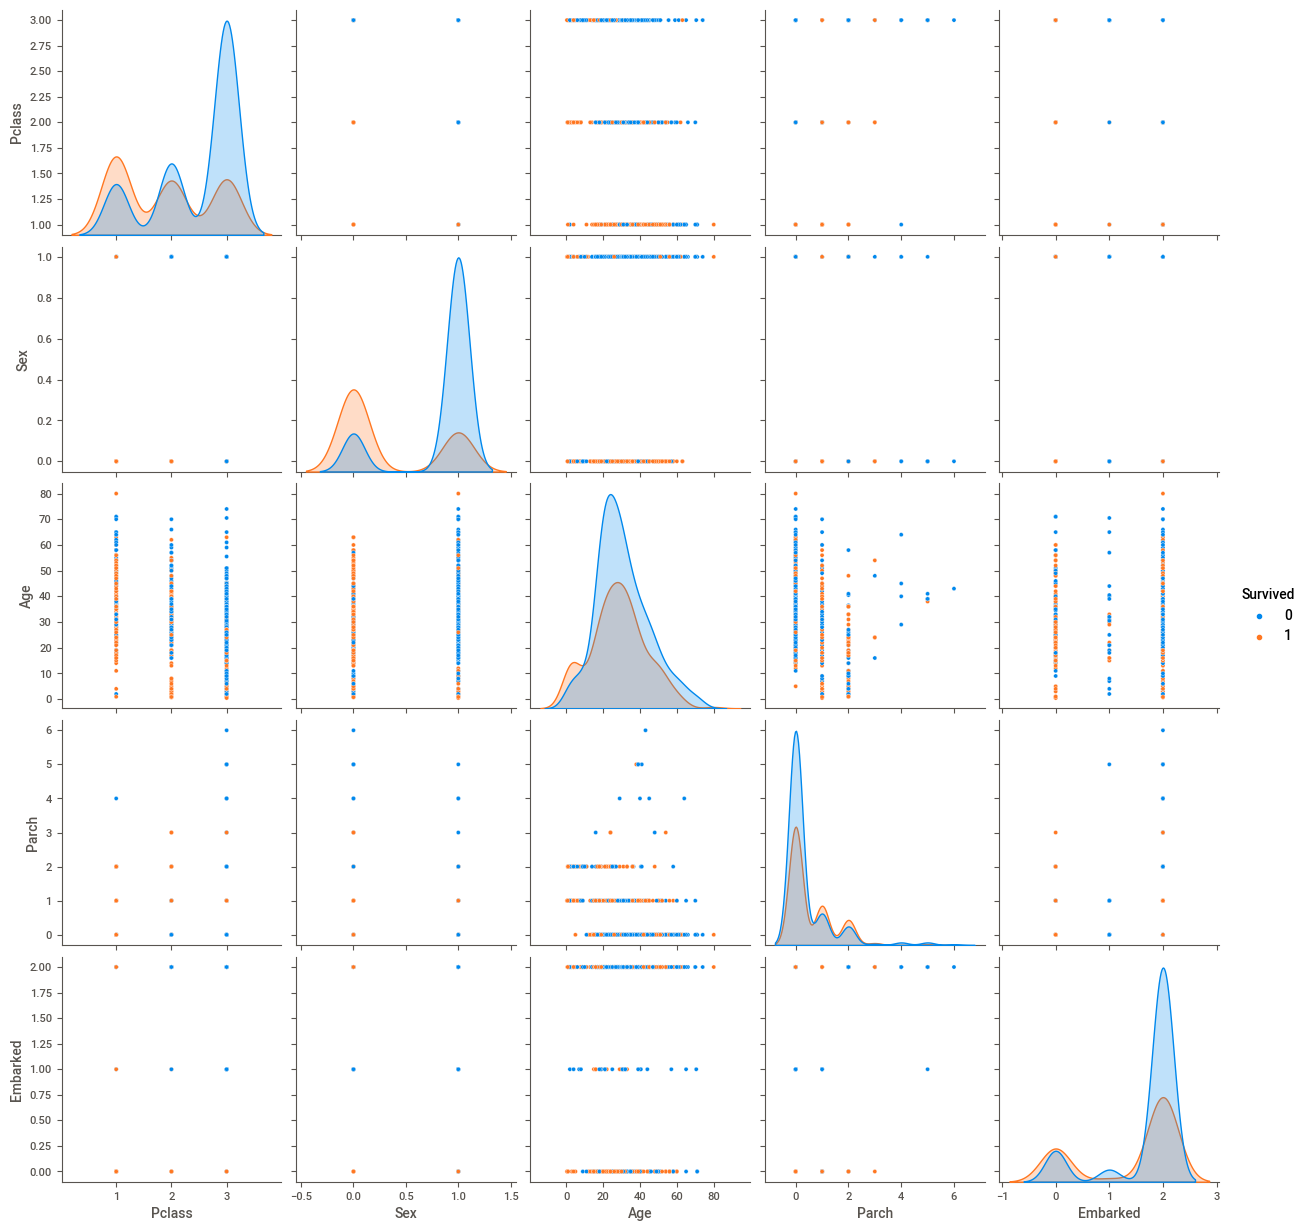

In [22]:
plt.figure(figsize=(16,9))
sns.pairplot(df2, hue="Survived", diag_kind="kde", vars=['Pclass', 'Sex', 'Age', 'Parch', 'Embarked'])
plt.show()

In [23]:
# train test split of data

from sklearn.model_selection import train_test_split

feature_classes = df2.drop(columns='Survived')
target_class = df2['Survived']

X_train, X_test, y_train, y_test = train_test_split(feature_classes, target_class, test_size=0.2, random_state=42)
print('shape of X_train: ', X_train.shape)
print('shape of X_test: ', X_test.shape)
print('shape of y_train: ', y_train.shape)
print('shape of y_test: ', y_test.shape)

shape of X_train:  (569, 6)
shape of X_test:  (143, 6)
shape of y_train:  (569,)
shape of y_test:  (143,)


In [24]:
# feature scaling

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

In [25]:
# applying Logistic Regression

from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
fit_model = log_reg.fit(X_train_sc, y_train)
print('Testing accuracy : ', (fit_model.score(X_test_sc, y_test)*100).round(3), '%')

Testing accuracy :  81.119 %


In [26]:
# prediction using trained model

y_pred = fit_model.predict(X_test_sc)
y_pred

array([1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0], dtype=int64)

In [27]:
lst = [var for var in y_test]
print(lst, end=' ')


[1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1] 


Precision: 0.86
Accuracy: 0.8111888111888111
Recall: 0.6825396825396826
F1-score: 0.7610619469026547

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.91      0.84        80
           1       0.86      0.68      0.76        63

    accuracy                           0.81       143
   macro avg       0.82      0.80      0.80       143
weighted avg       0.82      0.81      0.81       143


Confusion Matrix: 
[[73  7]
 [20 43]]


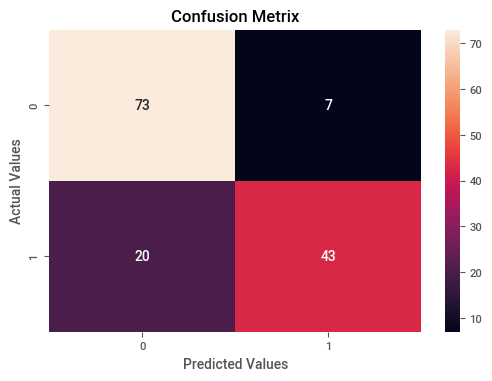

In [28]:
# Estimating Performance of model

from sklearn import metrics

print('\nPrecision: ' + str(metrics.precision_score(y_test, y_pred)))
print('Accuracy: ' + str(metrics.accuracy_score(y_test, y_pred)))
print('Recall: ' + str(metrics.recall_score(y_test, y_pred)))
print('F1-score: ' + str(metrics.f1_score(y_test, y_pred)))

print('\nClassification Report:\n' + str(metrics.classification_report(y_test, y_pred)))
print('\nConfusion Matrix: \n' + str(metrics.confusion_matrix(y_test, y_pred)))
sns.heatmap(metrics.confusion_matrix(y_test, y_pred), annot = True)
plt.title('Confusion Metrix')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')

plt.show()

In [29]:
# Checking Which features are important

from sklearn.ensemble import RandomForestClassifier

rf_class = RandomForestClassifier(random_state=42)
rf_fit = rf_class.fit(X_train, y_train)
feature_imp = rf_fit.feature_importances_
feature_imp

array([0.14757067, 0.29918865, 0.41457946, 0.06408205, 0.04378013,
       0.03079905])

In [30]:
feature_importance_df = pd.DataFrame({'Feature': feature_classes.columns, 'Importance': feature_imp})

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
feature_importance_df

,Feature,Importance
2,Age,0.414579
1,Sex,0.299189
0,Pclass,0.147571
3,SibSp,0.064082
4,Parch,0.043780
5,Embarked,0.030799


In [32]:
# saving the model
import joblib

save_moddel = joblib.dump(fit_model, 'P:\Artificial Intelligence\Machine Learning\Projects\Titanic_survived_prediction\\saved_titanic_model')